In [1]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
%matplotlib inline

### Parse logfiles for first three subjects (z1, KL, and AS, 2015) and three more subjects (ltd, gsy, mb, 2018)

In [2]:
subjects = {}

probe_images_path = '/home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/'

subjects['KL'] = {}
subjects['KL']['sourcefile'] = probe_images_path+'data/KL_2015_May_05_0828.log'

subjects['z1'] = {}
subjects['z1']['sourcefile'] = probe_images_path+'data/z1_2015_May_05_1518.log'

subjects['AS'] = {}
subjects['AS']['sourcefile'] = probe_images_path+'data/AS_2015_May_13_1320.log'

subjects['gsy'] = {}
subjects['gsy']['sourcefile'] = probe_images_path+'data/summer2018/GSY_2018_Jul_23_1339.log'

subjects['ltd'] = {}
subjects['ltd']['sourcefile'] = probe_images_path+'data/summer2018/ltd_2018_Jun_16_1126.log'

# subjects['MB'] = {}
# subjects['MB']['sourcefile'] = probe_images_path+'data/summer2018/MB_2018_Jun_21_0935.log'


save_path = '/home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/data/' ##had to move here from scratch

max_images_per_exp = 4


imagery_marker = '_img_'
perception_marker = '_pcp_'

subject_table = pd.DataFrame(subjects)

number_of_lines_in_chunk = 3

In [3]:
subject_table

,AS,KL,gsy,ltd,z1
sourcefile,/home/tnaselar/FAST/imagery_psychophysics/mult...,/home/tnaselar/FAST/imagery_psychophysics/mult...,/home/tnaselar/FAST/imagery_psychophysics/mult...,/home/tnaselar/FAST/imagery_psychophysics/mult...,/home/tnaselar/FAST/imagery_psychophysics/mult...


In [4]:
def starts_a_response_chunk(x):
    if 'New trial' in x:
        return True
    else:
        return False

def get_probe_number(new_line):
    return '_'.join(re.search('_probe\((.*?)\).png', new_line).group(1).split(','))
#     dx = new_line.index('_probe(')
#     if new_line[dx-2].isdigit():
#         return int(new_line[dx-2:dx])
#     else:
#         return int(new_line[dx-1])
    
# def get_repetition(new_line):
#     return int(new_line[new_line.index('rep=')+4])

def get_state(new_line):
    dx = new_line.index('probe(')
    state = new_line[dx-4:dx-1]
    if state:
        return state
    else:
        raise Exception('you are not at the start of a new trial')
#     if 'just-probes' in new_line:
#         return 'img'
#     elif 'probes-with-im' in new_line:
#         return 'pcp'
#     else:
        

def get_time_stamp(new_line):
    return float(new_line[0:new_line.index('\t')])

def get_response(new_line):
    try:
        return int(new_line[new_line.index('Keypress')+10])
    except:
        print('subject did not respond, returning None')
        return None
        
def skip_a_line(all_lines):
    return all_lines.pop(0)

def get_image(new_line):
    return re.search('poly_probes/probes/(.*?_\d\d)', new_line).group(1)
#     dx = new_line.index('finalprobeset')
#     return new_line[dx:(dx+15)]

# def scanFor(key, lines):
#     scanFuncDict = {'image': get_image, 'probe': get_probe_number, 'state' : get_state, 'image_one': }
#     if key not in expectedKeys:
#         raise Exception('key not expected')
     
    

In [5]:
f = '/musc.repo/Data/tnaselar/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_img_probe(1,11).png'
snippet = '27.9541	DATA	Keypress: 2'
print get_time_stamp(snippet)
print 'state: %s' %(get_state(f))
print get_response(snippet)
print get_image(f)

27.9541
state: img
2
candle_01


In [6]:
data_dict = {'subj': [], 'image': [], 'probe': [], 'state': [], 'image_on': [], 'resp_on': [], 'response': []}
for subj in subjects.keys():
    print subj    
    all_lines = open(subjects[subj]['sourcefile'], 'r').readlines()
    while all_lines:
        new_line = all_lines.pop(0)
        if starts_a_response_chunk(new_line):
            data_dict['subj'].append(subj)
            new_line = all_lines.pop(0)
            if new_line.find('WARNING') > 0:
                _ = skip_a_line(all_lines)
            if new_line.find('Keypress') > 0:  ##this means they really quickly pressed key, ignore it
                _= skip_a_line(all_lines)
            new_line = all_lines.pop(0)
            data_dict['probe'].append(get_probe_number(new_line))
            data_dict['state'].append(get_state(new_line))  
            data_dict['image'].append(get_image(new_line))
            data_dict['image_on'].append(get_time_stamp(all_lines.pop(0)))
            new_line = all_lines.pop(0)
            data_dict['resp_on'].append(get_time_stamp(new_line))
            data_dict['response'].append(get_response(new_line))
            


probe_exp = pd.DataFrame(data_dict)



gsy
subject did not respond, returning None
AS
ltd
subject did not respond, returning None
z1
subject did not respond, returning None
KL


In [7]:
# data_dict = {'subj': [], 'image': [], 'probe': [], 'state': [], 'image_on': [], 'resp_on': [], 'response': []}
# keys = data_dict.keys()
# for subj in subjects.keys():
#     print subj    
    
#     all_lines = open(subjects[subj]['sourcefile'], 'r').readlines()
    
#     while all_lines:
#         new_line = all_lines.pop(0)
#         if starts_a_response_chunk(new_line):
#             chunkLength = getChunkLength(all_lines)            
#             data_dict['subj'].append(subj)
#             for key in keys():
#                 wantedData = scanFor(key, all_lines[:chunkLength])
#                 data_dict[key].append(wantedData)
            
            


# probe_exp = pd.DataFrame(data_dict)

In [8]:
for subj in subjects.keys():
    df = probe_exp[probe_exp['subj']==subj]
    mins =  (df.iloc[-1].resp_on-df.iloc[0].resp_on)/60.
    print '%s time: %f hrs, %f min' %(subj, np.floor_divide(mins,60.), np.remainder(mins,60.))



gsy time: 2.000000 hrs, 43.143538 min
AS time: 1.000000 hrs, 27.366363 min
ltd time: 2.000000 hrs, 55.991025 min
z1 time: 2.000000 hrs, 8.710068 min
KL time: 2.000000 hrs, 49.004068 min


In [9]:
np.remainder(mins, 60)

49.00406833333332

In [10]:
probe_exp.describe()

,image_on,resp_on,response
count,8280.000000,8280.000000,8277.000000
mean,4210.087749,4214.734223,2.638637
std,3145.706123,3146.620647,1.495529
min,13.048200,27.954100,1.000000
25%,1520.766050,1523.159025,2.000000
50%,3421.954050,3431.019800,2.000000
75%,6910.118125,6916.837950,3.000000
max,10804.946600,10806.480100,9.000000


In [11]:
probe_exp.dtypes

image        object
image_on    float64
probe        object
resp_on     float64
response    float64
state        object
subj         object
dtype: object

In [12]:
probe_exp[0:3]

,image,image_on,probe,resp_on,response,state,subj
0,candle_01,215.1759,10_19_11,219.2427,NaN,img,gsy
1,candle_01,229.9761,10,231.3763,1.0,img,gsy
2,candle_01,231.4428,11,232.5763,1.0,img,gsy


In [13]:
probe_exp[:3]

,image,image_on,probe,resp_on,response,state,subj
0,candle_01,215.1759,10_19_11,219.2427,NaN,img,gsy
1,candle_01,229.9761,10,231.3763,1.0,img,gsy
2,candle_01,231.4428,11,232.5763,1.0,img,gsy


In [14]:
print probe_exp.loc[1]
print type(probe_exp.loc[1])


image       candle_01
image_on      229.976
probe              10
resp_on       231.376
response            1
state             img
subj              gsy
Name: 1, dtype: object
<class 'pandas.core.series.Series'>


In [15]:
diff = probe_exp.resp_on - probe_exp.image_on
diff.describe()

count    8280.000000
mean        4.646474
std         6.195280
min         0.266700
25%         1.466800
50%         2.867000
75%         5.666900
max       135.535800
dtype: float64

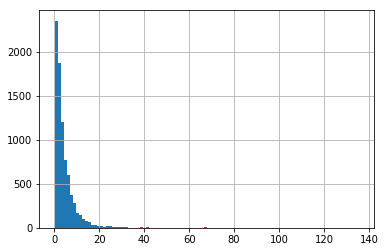

In [16]:
diff.hist(bins=100)

In [17]:
345*2.57/60.*4

59.11

In [18]:
probe_exp.loc[:, ['probe', 'response']].head()

,probe,response
0,10_19_11,NaN
1,10,1.0
2,11,1.0
3,0_1_10,1.0
4,34_43_35_44,2.0


In [19]:
probe_exp.iloc[0]

image       candle_01
image_on      215.176
probe        10_19_11
resp_on       219.243
response          NaN
state             img
subj              gsy
Name: 0, dtype: object

In [20]:
probe_exp.iloc[0:2, 1:3]

,image_on,probe
0,215.1759,10_19_11
1,229.9761,10


In [21]:
probe_exp[probe_exp['probe']=='40_41']


,image,image_on,probe,resp_on,response,state,subj
191,candle_01,1201.3270,40_41,1210.3939,1.0,img,gsy
623,candle_01,2762.0901,40_41,2762.8236,1.0,pcp,gsy
943,peaches_05,6236.9869,40_41,6250.2539,3.0,img,gsy
1251,peaches_05,9216.6401,40_41,9220.1072,4.0,pcp,gsy
1406,candle_01,283.9259,40_41,285.1594,1.0,img,AS
1758,candle_01,1538.8042,40_41,1539.5710,1.0,pcp,AS
2386,peaches_05,3213.1031,40_41,3215.9365,3.0,img,AS
2612,peaches_05,4546.5653,40_41,4550.3321,3.0,pcp,AS
3044,candle_01,1570.3098,40_41,1576.7767,2.0,img,ltd
3260,candle_01,2206.2550,40_41,2206.9884,1.0,pcp,ltd


In [22]:
probe_exp[probe_exp.probe.isin(['40','41','40_41'])]

,image,image_on,probe,resp_on,response,state,subj
29,candle_01,347.2449,40,352.7118,1.0,img,gsy
171,candle_01,1103.6586,41,1106.7921,1.0,img,gsy
191,candle_01,1201.3270,40_41,1210.3939,1.0,img,gsy
412,candle_01,2196.2125,41,2197.6793,1.0,pcp,gsy
433,candle_01,2256.2137,40,2258.3472,1.0,pcp,gsy
623,candle_01,2762.0901,40_41,2762.8236,1.0,pcp,gsy
738,peaches_05,3957.4793,41,3967.9463,2.0,img,gsy
785,peaches_05,4425.2880,40,4430.8215,3.0,img,gsy
943,peaches_05,6236.9869,40_41,6250.2539,3.0,img,gsy
1231,peaches_05,9069.1706,40,9073.1708,4.0,pcp,gsy


In [25]:
probe_exp.to_pickle(os.path.join(save_path+'multi_poly_probe_data_5_subjects.pkl'))